<a href="https://colab.research.google.com/github/VicenteAustria190528/Sistema-de-Arquivos-como-Arvore/blob/main/An%C3%A1lise_de_Acidentes_A%C3%A9reos_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

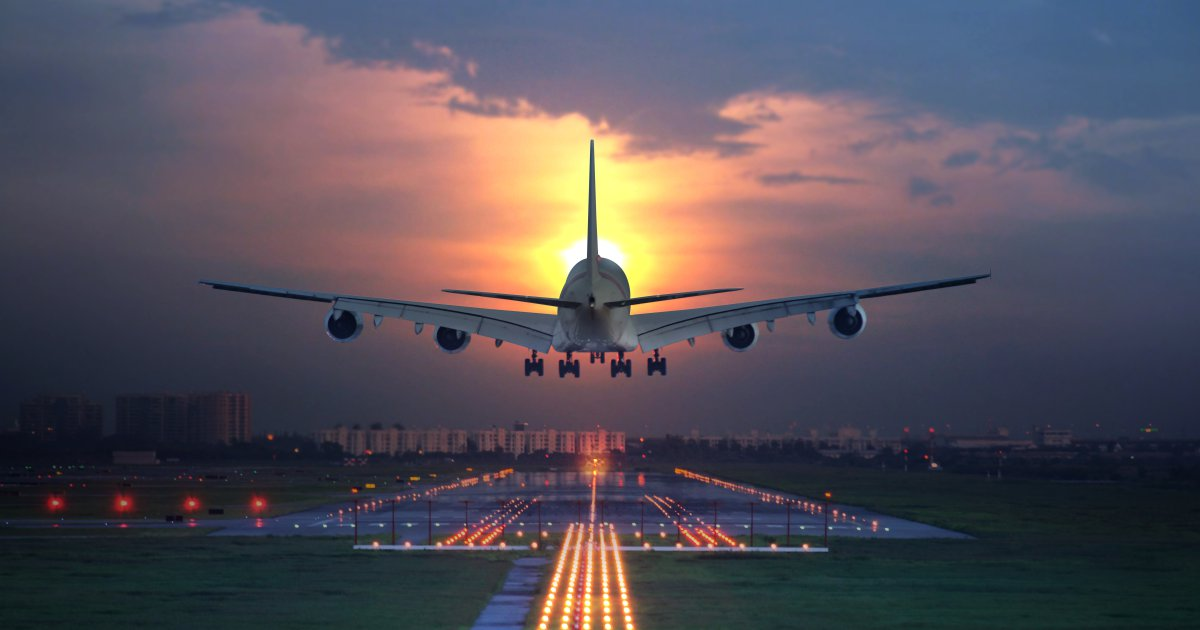

In [2]:
from IPython.display import Image, display

display(Image(filename='img/viegem-de-aviao.jpg'))

<h1>Análise de Ocorrências Aéreas no Brasil: Um Estudo Baseado em Dados Abertos</h1>

<h2>Introdução</h2>
<p>O transporte aéreo é reconhecido mundialmente como um dos meios mais seguros de deslocamento. Milhões de passageiros cruzam o céu todos os anos, conectando cidades, países e continentes em poucas horas. No entanto, apesar de toda a tecnologia embarcada e dos rigorosos protocolos de segurança, incidentes e acidentes ainda ocorrem.</p>

<p>Motivado por um interesse pessoal em entender melhor os fatores envolvidos nesses eventos, decidi realizar este estudo com base em dados reais. Casos como o do voo da Chapecoense, que ganharam grande repercussão na mídia, evidenciam a importância de analisar com atenção as estatísticas e tendências relacionadas à aviação.</p>

<h2>Objetivo deste Estudo</h2>
<p>O principal objetivo deste trabalho é explorar e analisar dados de ocorrências aeronáuticas no Brasil, buscando identificar padrões, fatores de risco e possíveis pontos de atenção que possam contribuir para a prevenção de novos incidentes.</p>

<h2>Sobre os Dados Utilizados</h2>
<p>Para realizar este estudo, utilizei dados públicos disponibilizados pelo <strong>CENIPA (Centro de Investigação e Prevenção de Acidentes Aeronáuticos)</strong>. Esses dados são atualizados periodicamente e podem ser consultados diretamente na página oficial de Dados Abertos do governo brasileiro.</p>

<p>Neste projeto, trabalhei com dois conjuntos de dados principais:</p>
<ul>
<li><strong>ocorrencia.csv:</strong> Contém detalhes sobre cada ocorrência registrada, incluindo informações como data, tipo de ocorrência, localização geográfica e status da investigação.</li>
<li><strong>aeronave.csv:</strong> Apresenta dados relacionados às aeronaves envolvidas nas ocorrências, como modelo, fabricante, tipo de motor, quantidade de motores, número de fatalidades, entre outras informações técnicas.</li>
</ul>

<h2>Referência de Projeto Utilizado como Base</h2>

<p>Este trabalho foi desenvolvido de forma autoral, mas teve como inspiração o projeto disponível publicamente no GitHub:</p>

<p><a href="https://github.com/paulozip/acidentes-aereos" target="_blank">https://github.com/paulozip/acidentes-aereos</a></p>

<p>A partir dessa base, novas perguntas de análise foram definidas, os códigos foram reestruturados e novas visualizações foram criadas com o objetivo de ampliar o entendimento sobre os dados de ocorrências aeronáuticas no Brasil.</p>

<h2>Perguntas a serem respondidas</h2>

<h3>Perguntas gerais sobre o tema:</h3>
<ul>
<li>Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?</li>
<li>Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?</li>
<li>Quais os estados que mais possuem ocorrências registradas?</li>
<li>Qual tipo de aeronave possui mais problemas? Aviões, jatos, planadores?</li>
<li>Quais as fabricantes com maior número de defeitos registrados?</li>
<li>Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?</li>
<li>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</li>
<li>Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?</li>
</ul>

<h3>Perguntas escolhidas para análise detalhada neste trabalho:</h3>
<ol>
<li>Como evoluiu o número de ocorrências aéreas no Brasil ao longo dos anos?</li>
<li>Quais estados (UFs) concentram o maior número de ocorrências?</li>
<li>Durante qual fase do voo os acidentes com fatalidades são mais frequentes?</li>
<li>A idade da aeronave (ano de fabricação) influencia na gravidade do dano?</li>
<li>Quanto tempo, em média, leva uma investigação até a publicação do relatório final?</li>
</ol>


<h2>Importando bibliotecas</h2>

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

<h2>Leitura dos datasets</h2>

In [ ]:
# Lendo os datasets a partir da pasta datasets
df_ocorrencia = pd.read_csv('datasets/ocorrencia.csv', sep=';', encoding='latin1')
df_aeronave = pd.read_csv('datasets/aeronave.csv', sep=';', encoding='latin1')

# Visualizando as 5 primeiras linhas de cada
print("Dataset Ocorrências:")
display(df_ocorrencia.head())

print("\nDataset Aeronaves:")
display(df_aeronave.head())

<h2>Limpeza de Dados (Data Cleaning)</h2>

In [19]:
# Limpeza e pré-processamento dos dados

# Removendo espaços extras dos nomes das colunas para evitar erros de acesso
df_ocorrencia.columns = df_ocorrencia.columns.str.strip()
df_aeronave.columns = df_aeronave.columns.str.strip()

# Convertendo colunas de datas do dataset de Ocorrências para o formato datetime
df_ocorrencia['dia_ocorrencia'] = pd.to_datetime(df_ocorrencia['dia_ocorrencia'], errors='coerce')
df_ocorrencia['dia_publicacao'] = pd.to_datetime(df_ocorrencia['dia_publicacao'], errors='coerce')

# Criando uma nova coluna 'ano' com base na data da ocorrência
df_ocorrencia['ano'] = df_ocorrencia['dia_ocorrencia'].dt.year

# Verificando a quantidade de valores nulos nas principais colunas de Ocorrências
print("\nValores nulos nas principais colunas do dataset de Ocorrências:")
print(df_ocorrencia[['dia_ocorrencia', 'uf', 'classificacao']].isnull().sum())

# Verificando a quantidade de valores nulos nas principais colunas de Aeronaves
print("\nValores nulos nas principais colunas do dataset de Aeronaves:")
print(df_aeronave[['ano_fabricacao', 'fase_operacao', 'quantidade_fatalidades']].isnull().sum())

# Tratando valores ausentes:
# Preenchendo UFs não informadas com 'Não Informado'
df_ocorrencia['uf'] = df_ocorrencia['uf'].fillna('Não Informado')

# Preenchendo fases de operação desconhecidas com 'Desconhecida'
df_aeronave['fase_operacao'] = df_aeronave['fase_operacao'].fillna('Desconhecida')

# Preenchendo anos de fabricação ausentes com zero (0)
df_aeronave['ano_fabricacao'] = df_aeronave['ano_fabricacao'].fillna(0)



Valores nulos nas principais colunas do dataset de Ocorrências:
dia_ocorrencia    0
uf                0
classificacao     0
dtype: int64

Valores nulos nas principais colunas do dataset de Aeronaves:
ano_fabricacao               0
fase_operacao                0
quantidade_fatalidades    1688
dtype: int64


<h2>Visualização dos Dados (Data Visualization)</h2>

<h3>Pergunta 1: Como evoluiu o número de ocorrências aéreas no Brasil ao longo dos anos?</h3>

<p>Para iniciar a análise, foi feita uma contagem do número total de ocorrências aéreas registradas por ano. Essa análise permite observar possíveis tendências de crescimento ou redução no número de casos ao longo do tempo.</p>

<p>Os dados foram agrupados com base na coluna <strong>ano</strong>, criada a partir da data de ocorrência presente no dataset. A seguir, o resultado foi representado através de um gráfico de linha, facilitando a visualização de variações ano a ano.</p>


Número de ocorrências por ano:
ano
2006    117
2007    126
2008    148
2009    156
2010    194
2011    255
2012    287
2013    269
2014    252
2015    223
Name: count, dtype: int64


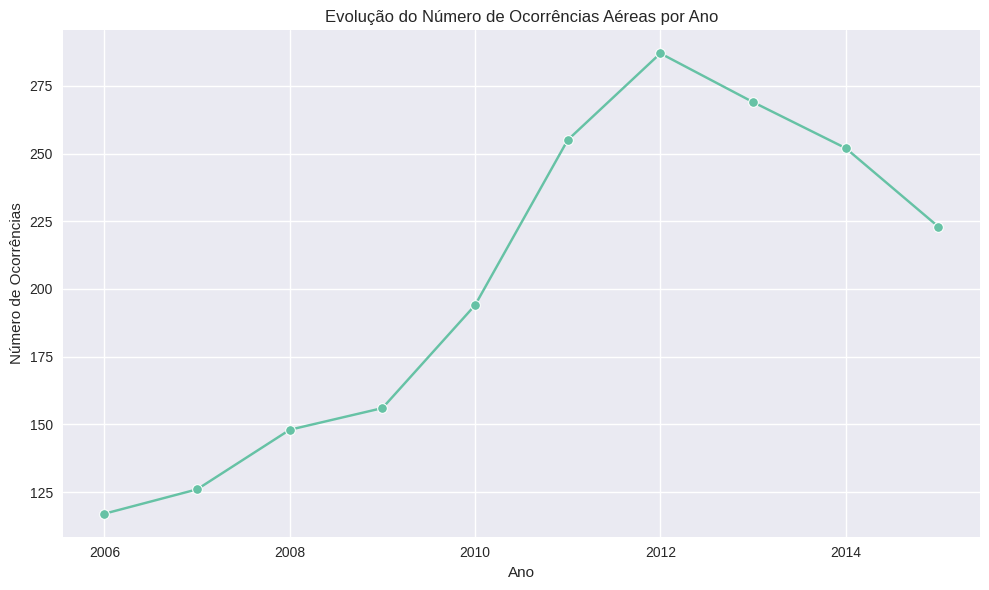

In [20]:
# Agrupando os dados pelo ano de ocorrência
ocorrencias_por_ano = df_ocorrencia['ano'].value_counts().sort_index()

# Exibindo a contagem de ocorrências por ano
print("Número de ocorrências por ano:")
print(ocorrencias_por_ano)

# Criando o gráfico de linha
plt.figure(figsize=(10,6))
sns.lineplot(x=ocorrencias_por_ano.index, y=ocorrencias_por_ano.values, marker='o')
plt.title('Evolução do Número de Ocorrências Aéreas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3>Pergunta 2: Quais estados (UFs) concentram o maior número de ocorrências?</h3>

<p>Para entender a distribuição geográfica das ocorrências aéreas no Brasil, foi feita uma análise considerando a coluna <strong>uf</strong>, que representa a unidade federativa onde o evento ocorreu.</p>

<p>Os dados foram agrupados e ordenados pela quantidade de registros por estado. O resultado foi representado por meio de um gráfico de barras, evidenciando os estados com maior concentração de casos.</p>


Número de ocorrências por estado (UF):
uf
SP     434
RS     169
PR     154
MT     153
MG     152
GO     141
RJ     120
PA     119
BA      83
AM      81
MS      72
SC      58
MA      40
DF      30
TO      30
PE      29
CE      25
RR      25
PI      20
ES      16
RO      14
AC      14
AL      12
EX       8
SE       7
RN       7
AP       6
PB       6
***      2
Name: count, dtype: int64


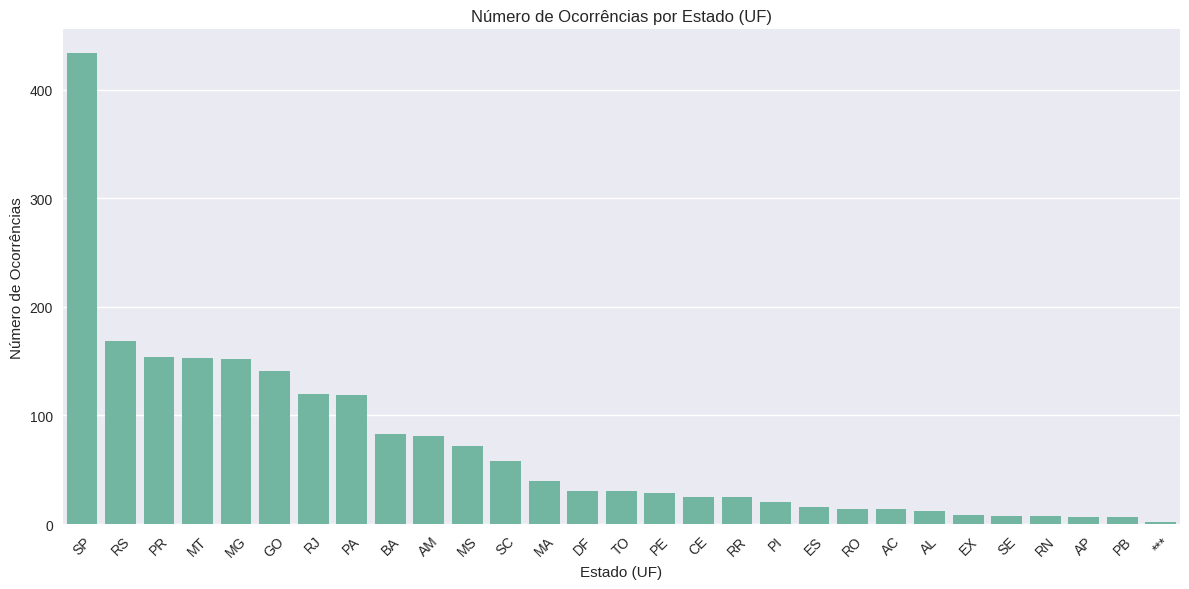

In [27]:
# Importando o módulo de warnings para ocultar mensagens indesejadas
import warnings
warnings.filterwarnings("ignore")  # Oculta warnings do Matplotlib sobre fontes e outros avisos

# Agrupando os dados por estado (UF)
ocorrencias_por_uf = df_ocorrencia['uf'].value_counts().sort_values(ascending=False)

# Exibindo os estados com mais ocorrências
print("Número de ocorrências por estado (UF):")
print(ocorrencias_por_uf)

# Criando o gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=ocorrencias_por_uf.index, y=ocorrencias_por_uf.values)
plt.title('Número de Ocorrências por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Pergunta 3: Durante qual fase do voo os acidentes com fatalidades são mais frequentes?</h3>

<p>Para responder a essa pergunta, foi realizada uma análise cruzando os campos <strong>fase_operacao</strong> (fase do voo em que a ocorrência aconteceu) e <strong>quantidade_fatalidades</strong> (número de mortes registradas na aeronave).</p>

<p>A soma total de fatalidades foi calculada para cada fase da operação, como decolagem, cruzeiro, aproximação e pouso. O resultado foi apresentado em um gráfico de barras, permitindo identificar as fases mais críticas em relação a fatalidades.</p>


Número total de fatalidades por fase de operação:
fase_operacao
CRUZEIRO                             344.0
POUSO                                216.0
DECOLAGEM                            129.0
SUBIDA                                69.0
INDETERMINADA                         67.0
MANOBRA                               65.0
DESCIDA                               55.0
APROXIMAÃÃO FINAL                   48.0
CIRCUITO DE TRÃFEGO                  35.0
OUTRA FASE                            30.0
NAVEGAÃÃO A BAIXA ALTURA            29.0
ESPECIALIZADA                         21.0
ARREMETIDA NO AR                      11.0
RETA FINAL                             4.0
ARREMETIDA NO SOLO                     4.0
CORRIDA APÃS POUSO                    4.0
PAIRADO                                3.0
OPERAÃÃO DE SOLO                     2.0
CHEQUE DE MOTOR OU ROTOR               1.0
ESTACIONAMENTO                         1.0
TÃXI                                  1.0
DECOLAGEM VERTICAL               

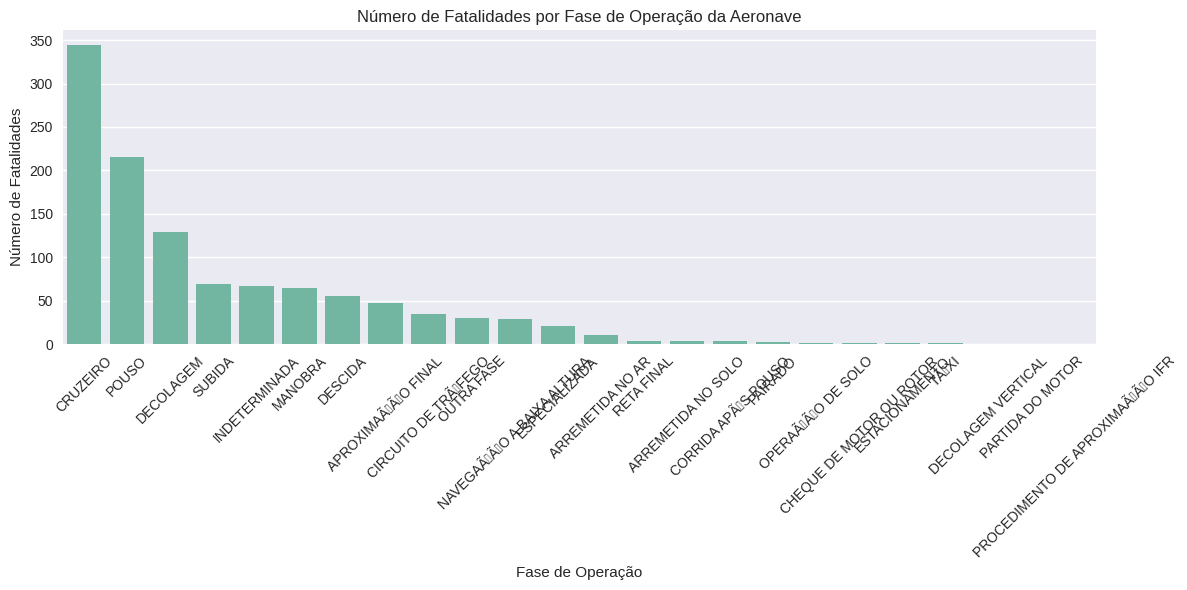

In [26]:
# Importando o módulo de warnings para ocultar mensagens indesejadas
import warnings
warnings.filterwarnings("ignore")  # Oculta warnings do Matplotlib sobre fontes e outros avisos

# Agrupando e somando o número total de fatalidades por fase de operação da aeronave
fase_fatalidades = df_aeronave.groupby('fase_operacao')['quantidade_fatalidades'].sum().sort_values(ascending=False)

# Exibindo o total de fatalidades por fase de operação
print("Número total de fatalidades por fase de operação:")
print(fase_fatalidades)

# Criando o gráfico de barras para visualizar o número de fatalidades por fase do voo
plt.figure(figsize=(12,6))
sns.barplot(x=fase_fatalidades.index, y=fase_fatalidades.values)
plt.title('Número de Fatalidades por Fase de Operação da Aeronave')
plt.xlabel('Fase de Operação')
plt.ylabel('Número de Fatalidades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Pergunta 4: A idade da aeronave influencia na gravidade do dano?</h3>

<p>O objetivo desta análise foi verificar se aeronaves mais antigas estão mais sujeitas a danos mais graves em casos de ocorrências.</p>

<p>Para isso, foi calculada a idade aproximada de cada aeronave no momento da ocorrência, com base no ano de fabricação registrado no dataset. Em seguida, as aeronaves foram classificadas em faixas de idade (exemplo: 0-10 anos, 11-20 anos, etc).</p>

<p>Os dados foram agrupados por faixa de idade e pelo nível de dano sofrido, sendo representados em um gráfico de barras empilhadas, facilitando a comparação entre diferentes faixas etárias das aeronaves.</p>

<h4>Classificações de Nível de Dano:</h4>
<ul>
  <li><strong>Nenhum:</strong> A aeronave não sofreu danos na estrutura.</li>
  <li><strong>Leve:</strong> Danos estruturais de pequena extensão, geralmente com baixo impacto na operação da aeronave.</li>
  <li><strong>Substancial:</strong> Danos estruturais significativos, que afetam a integridade da aeronave, exigindo reparos complexos.</li>
  <li><strong>Destruída:</strong> A aeronave foi considerada perda total após a ocorrência.</li>
  <li><strong>Não Informado:</strong> Casos em que o nível de dano não foi registrado ou informado nos dados originais.</li>
</ul>


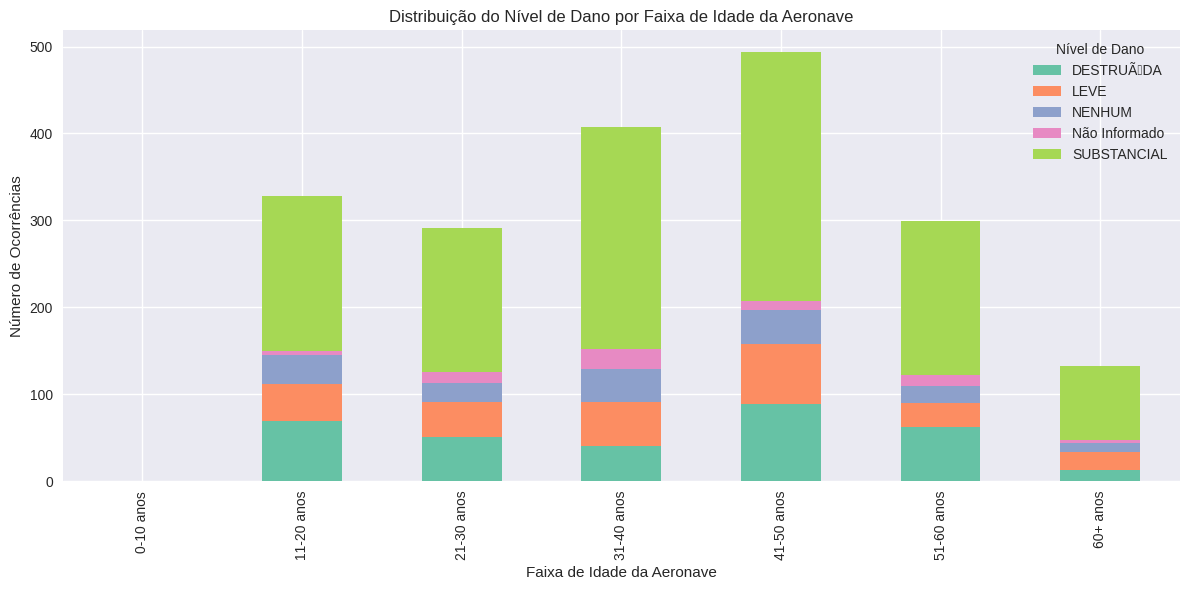

In [31]:
# Calculando a idade da aeronave no momento da ocorrência
df_aeronave['idade_aeronave'] = 2025 - df_aeronave['ano_fabricacao']  # Ajuste o ano atual conforme necessário

# Removendo possíveis valores negativos ou zero (aeronaves sem ano de fabricação informado ou dados inválidos)
df_aeronave = df_aeronave[df_aeronave['idade_aeronave'] > 0]

# Criando faixas de idade para facilitar a análise
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10 anos', '11-20 anos', '21-30 anos', '31-40 anos', '41-50 anos', '51-60 anos', '60+ anos']
df_aeronave['faixa_idade'] = pd.cut(df_aeronave['idade_aeronave'], bins=bins, labels=labels, right=False)

# Agrupando e contando o nível de dano por faixa de idade
dano_por_idade = df_aeronave.groupby(['faixa_idade', 'nivel_dano']).size().unstack().fillna(0)

# Recriando o gráfico de barras empilhadas
dano_por_idade = df_aeronave.groupby(['faixa_idade', 'nivel_dano']).size().unstack().fillna(0)

dano_por_idade.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição do Nível de Dano por Faixa de Idade da Aeronave')
plt.xlabel('Faixa de Idade da Aeronave')
plt.ylabel('Número de Ocorrências')
plt.legend(title='Nível de Dano')
plt.tight_layout()
plt.show()


<h3>Pergunta 5: Quanto tempo, em média, leva uma investigação até a publicação do relatório final?</h3>

<p>O objetivo desta análise foi medir o tempo necessário para a conclusão das investigações realizadas pelo CENIPA, considerando o período entre a data da ocorrência e a data de publicação do relatório final.</p>

<p>Para isso, foi criada uma nova coluna chamada <strong>tempo_investigacao</strong>, que representa a diferença em dias entre as datas de início da ocorrência e de publicação do relatório.</p>

<p>Foram excluídas da análise as ocorrências que ainda não tiveram o relatório final publicado (ou que não possuem data registrada). A distribuição dos tempos de investigação foi visualizada através de um histograma, permitindo identificar a média e a dispersão dos tempos de análise dos casos.</p>


Resumo estatístico do tempo de investigação (em dias):
count     995.000000
mean      773.267337
std       611.763400
min         7.000000
25%       317.500000
50%       577.000000
75%      1028.500000
max      3589.000000
Name: tempo_investigacao, dtype: float64


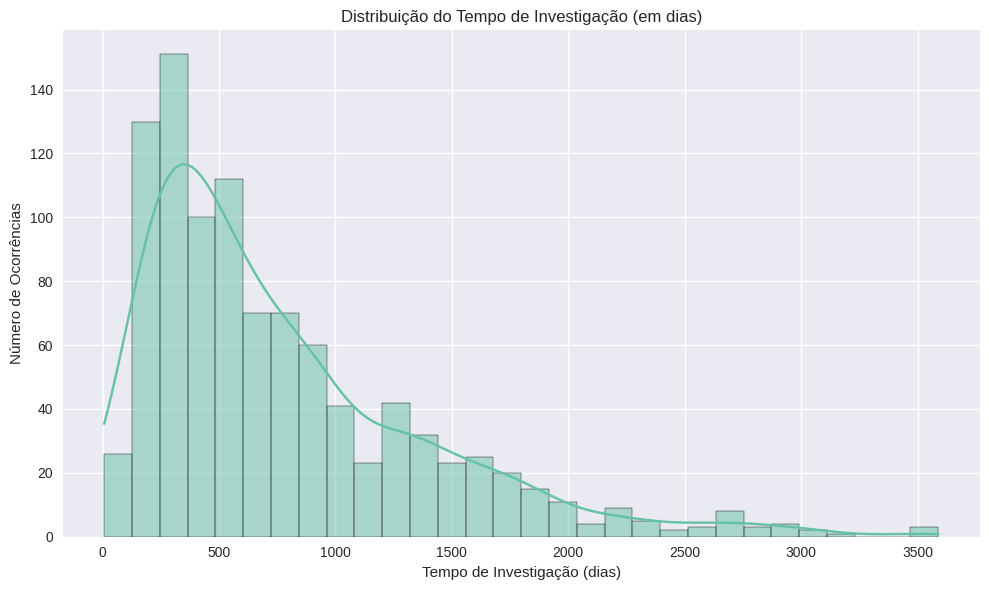

In [32]:
# Criando uma nova coluna com a diferença de dias entre a ocorrência e a publicação do relatório
df_ocorrencia['tempo_investigacao'] = (df_ocorrencia['dia_publicacao'] - df_ocorrencia['dia_ocorrencia']).dt.days

# Filtrando apenas os casos que possuem data de publicação (evitar nulos)
df_tempo_investigado = df_ocorrencia.dropna(subset=['tempo_investigacao'])

# Exibindo estatísticas básicas sobre o tempo de investigação
print("Resumo estatístico do tempo de investigação (em dias):")
print(df_tempo_investigado['tempo_investigacao'].describe())

# Criando um histograma para visualizar a distribuição
plt.figure(figsize=(10,6))
sns.histplot(df_tempo_investigado['tempo_investigacao'], bins=30, kde=True)
plt.title('Distribuição do Tempo de Investigação (em dias)')
plt.xlabel('Tempo de Investigação (dias)')
plt.ylabel('Número de Ocorrências')
plt.tight_layout()
plt.show()


<h3>Bônus: Visualização Geográfica - Distribuição de Ocorrências por Estado (UF)</h3>

<p>Como forma de análise adicional, foi criada uma visualização da distribuição de ocorrências aéreas por estado brasileiro, utilizando o campo <strong>uf</strong> presente no dataset.</p>

<p>A escolha foi por um gráfico de barras horizontal, permitindo identificar de maneira clara os estados com maior e menor número de ocorrências registradas.</p>

<p>Para aprimoramentos futuros, seria possível desenvolver um mapa geográfico real por meio da integração com shapefiles de estados brasileiros.</p>


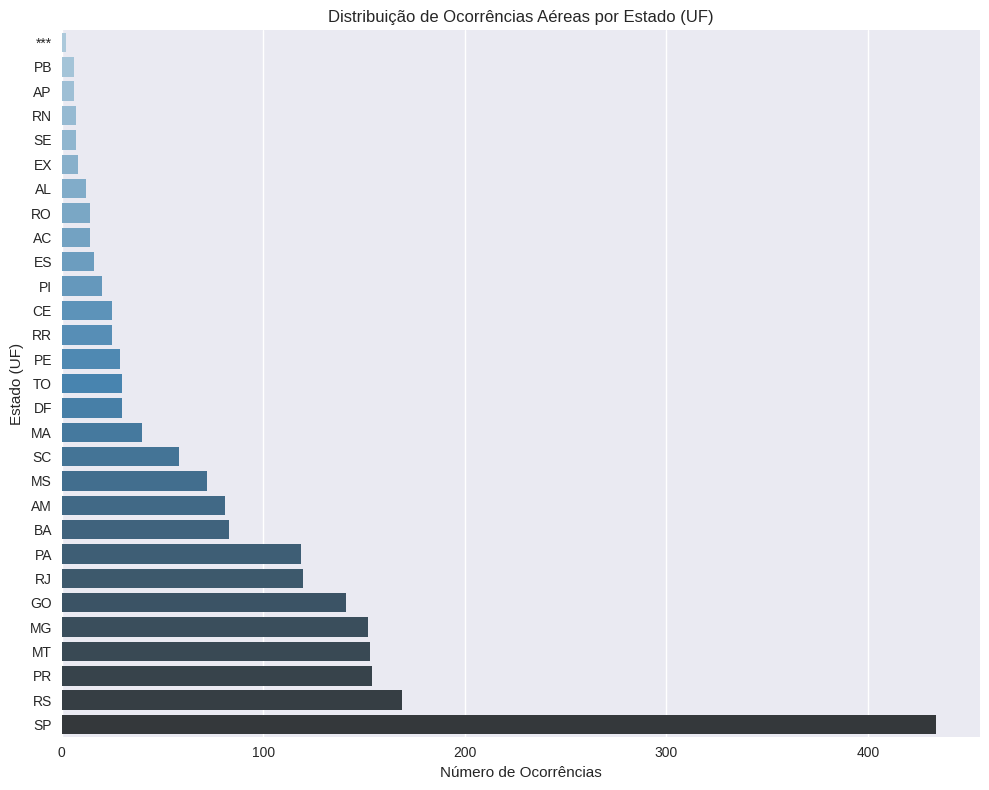

In [36]:
# Agrupando o número de ocorrências por estado (UF)
ocorrencias_por_uf = df_ocorrencia['uf'].value_counts().sort_values(ascending=True)

# Criando um gráfico de barras horizontal para representar a distribuição por estado
plt.figure(figsize=(10,8))
sns.barplot(x=ocorrencias_por_uf.values, y=ocorrencias_por_uf.index, palette='Blues_d')
plt.title('Distribuição de Ocorrências Aéreas por Estado (UF)')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Estado (UF)')
plt.tight_layout()
plt.show()


<h2>Conclusão Geral</h2>

<p>Este estudo teve como objetivo explorar e analisar os dados de ocorrências aeronáuticas no Brasil, utilizando informações públicas disponibilizadas pelo CENIPA. Por meio de diferentes abordagens de análise, foi possível responder a perguntas relevantes sobre a segurança da aviação no país.</p>

<p>As análises mostraram como o número de ocorrências tem evoluído ao longo dos anos, quais estados concentram mais registros, em que fases do voo os acidentes com fatalidades são mais frequentes, a relação entre a idade das aeronaves e o nível de dano, além do tempo médio de duração das investigações até a publicação do relatório final.</p>

<p>Além disso, foi incluída uma visualização geográfica bônus, destacando a distribuição das ocorrências por estado.</p>

<p>Este projeto também serviu como uma excelente oportunidade para aplicar conceitos de análise de dados, limpeza de datasets e criação de visualizações com o uso de Python e bibliotecas como Pandas, Matplotlib e Seaborn.</p>

<p>Como continuação, seria interessante explorar análises mais avançadas, como o uso de Machine Learning para prever a gravidade das ocorrências, ou integrar dados climáticos e operacionais para enriquecer os insights.</p>
